In [187]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
from math import exp
import pandas as pd
from sklearn.model_selection import train_test_split

# 8

## Input

In [15]:
width,height = 243,320

In [2]:
PATH = 'yalefaces/'

In [3]:
for dir_name,_,filenames in os.walk(PATH):
    print(dir_name)

yalefaces/


In [4]:
sub14 = [i for i in filenames if '14' in i]
sub1 = [i for i in filenames if '01' in i]

In [5]:
sub14

['subject14.happy.gif',
 'subject14-test.gif',
 'subject14.rightlight.gif',
 'subject14.sad.gif',
 'subject14.leftlight.gif',
 'subject14.wink.gif',
 'subject14.normal.gif',
 'subject14.noglasses.gif',
 'subject14.glasses.gif',
 'subject14.sleepy.gif']

In [6]:
sub1

['subject01.happy.gif',
 'subject01.surprised.gif',
 'subject01.noglasses.gif',
 'subject01-test.gif',
 'subject01.glasses.gif',
 'subject01.normal.gif',
 'subject01.sad.gif',
 'subject01.wink.gif',
 'subject01.leftlight.gif',
 'subject01.rightlight.gif',
 'subject01.sleepy.gif']

In [7]:
test_sub14 = 'subject14-test.gif'
sub14.remove('subject14-test.gif')

sub1.remove('subject01-test.gif')
test_sub1 = 'subject01-test.gif'

In [8]:
train14 = [np.array(Image.open(PATH+i)).flatten() for i in sub14]
train1 = [np.array(Image.open(PATH+i)).flatten() for i in sub1]

In [9]:
print(train1[1].shape)
print(train14[0].shape)

(77760,)
(77760,)


## 8.1

### Mean Faces

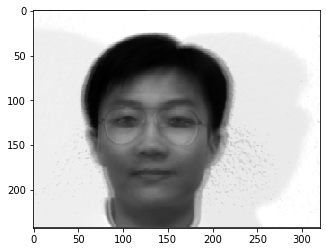

In [10]:
mean_face14 = np.zeros((243*320))

for i in train14:
    mean_face14 = np.add(mean_face14,i)

mean_face14 /= len(train14)

plt.imshow(mean_face14.reshape(243,320), cmap='gray')
plt.show()

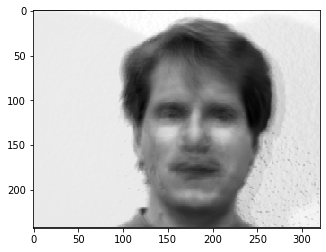

In [12]:
mean_face1 = np.zeros((243*320))

for i in train1:
    mean_face1 = np.add(mean_face1,i)

mean_face1 /= len(train1)

plt.imshow(mean_face1.reshape(243,320), cmap='gray')
plt.show()

In [38]:
vec14 = np.array(train14)
vec1 = np.array(train1)

### Normalized faces
`PCA requires centered points` and it is also easy to work when we have a normalized face to have a centralised value

In [13]:
normalised14 = np.ndarray(shape=(len(train14),243*320 ))

for i in range(len(train14)):
    normalised14[i] = np.subtract(train14[i],mean_face14)

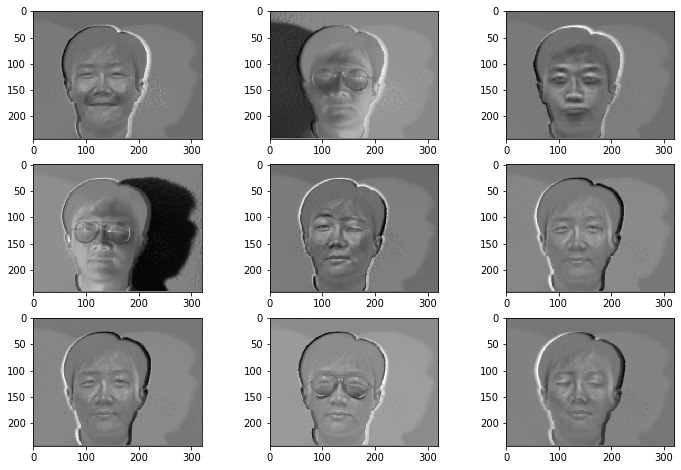

In [19]:
f,ax = plt.subplots(3,3,figsize=(12,8))
ax = ax.ravel()
for i in range(len(train14)):
    img = normalised14[i].reshape(243,320)
    ax[i].imshow(img, cmap='gray')

In [14]:
normalised1 = np.ndarray(shape=(len(train1),243*320 ))

for i in range(len(train1)):
    normalised1[i] = np.subtract(train1[i],mean_face1)

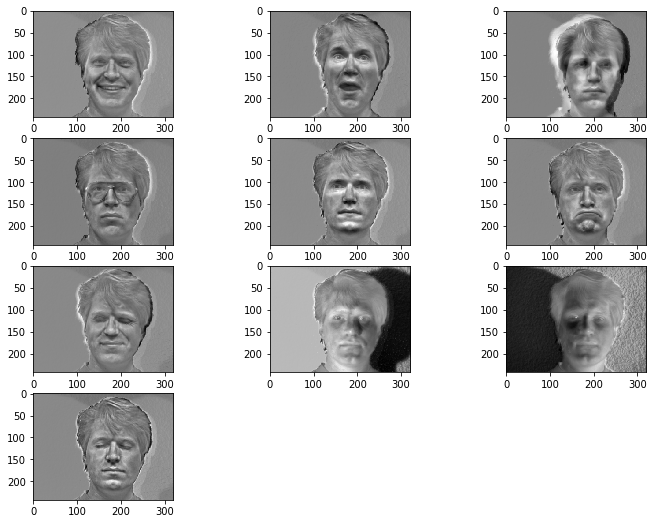

In [23]:
f,ax = plt.subplots(4,3,figsize=(12,9))
ax = ax.ravel()
for i in range(len(train1)):
    img = normalised1[i].reshape(243,320)
    ax[i].imshow(img, cmap='gray')
    
f.delaxes(ax[-1])
f.delaxes(ax[-2])

### Covariances matrices

In [26]:
cov_matrix14 = np.cov(normalised14)
cov_matrix14 = np.divide(cov_matrix14,len(normalised14))
###############################################################
cov_matrix1 = np.cov(normalised1)
cov_matrix1 = np.divide(cov_matrix1,len(normalised1))

### Eigen values , Eign Vectors
Each one of the normalized images will be having eigenvalues equal to the total number of images

In [27]:
eigenvalues14, eigenvectors14, = np.linalg.eig(cov_matrix14)
##########################################################
eigenvalues1, eigenvectors1, = np.linalg.eig(cov_matrix1)

In [28]:
print(eigenvalues1)

array([ 9.34486707e+02,  2.98028166e+02,  1.89200974e+02,  1.01683727e+02,
        6.94740939e+01, -1.18346172e-13,  3.86110839e+01,  1.66603028e+01,
        2.33379524e+01,  2.66764708e+01])

In [29]:
print(eigenvalues14)

[ 8.62621663e+02  3.27844681e+02  1.67496484e+02  5.06145565e+01
  3.73974139e+01  2.62838970e+01  2.76255242e+01 -1.00132836e-13
 -3.64230092e-16]


### Get the eigenvalue,vectors 
Get in a pair so that we can sort those in decreasing amount of explained variance

In [32]:
eig_pairs14 = [(eigenvalues14[index], eigenvectors14[:,index]) for index in range(len(eigenvalues14))]
eig_pairs14.sort(reverse=True) # Sort the eigen pairs in descending order:
eigvalues_sort14  = [eig_pairs14[index][0] for index in range(len(eigenvalues14))]
eigvectors_sort14 = [eig_pairs14[index][1] for index in range(len(eigenvalues14))]

######################################################################################

eig_pairs1 = [(eigenvalues1[index], eigenvectors1[:,index]) for index in range(len(eigenvalues1))]
eig_pairs1.sort(reverse=True)
eigvalues_sort1  = [eig_pairs1[index][0] for index in range(len(eigenvalues1))]
eigvectors_sort1 = [eig_pairs1[index][1] for index in range(len(eigenvalues1))]

### Cumulative variance
Variance explained by each component 

In [33]:
var_comp_sum14 = np.cumsum(eigvalues_sort14)/sum(eigvalues_sort14)
print(var_comp_sum14)

###################################################################
var_comp_sum1 = np.cumsum(eigvalues_sort1)/sum(eigvalues_sort1)
print(var_comp_sum1)

[0.5751255  0.79370549 0.90537844 0.93912408 0.96405761 0.98247605
 1.         1.         1.        ]
[0.55029384 0.72579454 0.83720985 0.89708864 0.93800005 0.96073706
 0.97644611 0.9901892  1.         1.        ]


## Ans 8.1

It means that the first axis for subject 14 has explained 57% of variance, first and second has explained 79% and so on. First 6 axis represent the 98% and 96% of the total variance inside the normalized images.

In other words, we can say that if we use the first 6 eigenvalues instead of whole images, we can explain the 98% for the subject14's image

### Get top 6 eigenvalues

In [79]:
top6_14 = np.array(eigvectors_sort14[:6]).transpose()
#####################################################
top6_1 = np.array(eigvectors_sort1[:6]).transpose()

# 8.2

### Getting Projections
These are the projected eigen spaces

dot product of original_images_vector.T with the top6 eigen values

In [39]:
projected14 = np.dot(vec14.transpose(),top6_14).transpose()
############################################################
projected1 = np.dot(vec1.transpose(),top6_1).transpose()

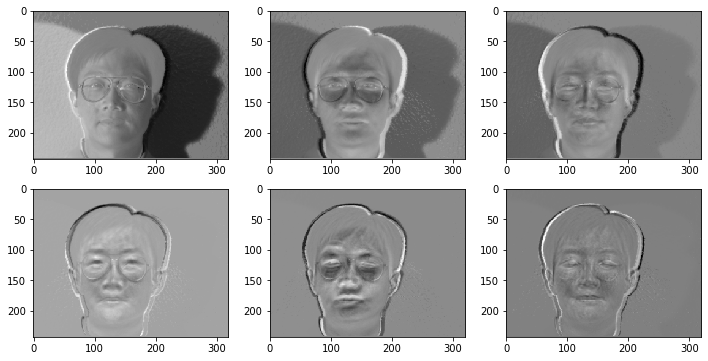

In [47]:
f,ax = plt.subplots(2,3,figsize=(12,6))
ax = ax.ravel()
for i in range(len(projected14)):
    img = projected14[i].reshape(width,height)
    ax[i].imshow(img, cmap='gray')

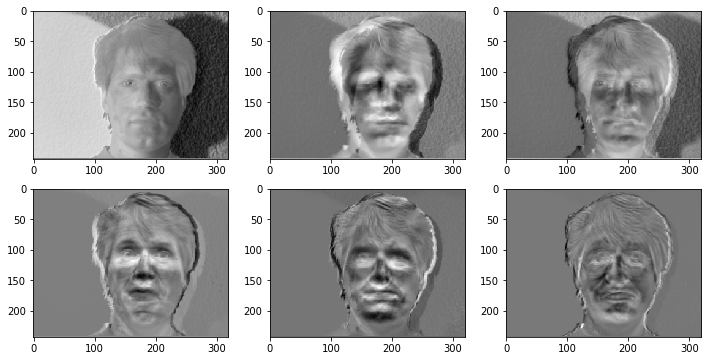

In [48]:
f,ax = plt.subplots(2,3,figsize=(12,6))
ax = ax.ravel()
for i in range(len(projected1)):
    img = projected1[i].reshape(width,height)
    ax[i].imshow(img, cmap='gray')

Get the weights of each normalized by having dot product of each input image corresponding to the projected eigenspace

In [75]:
weight14 = np.array([np.dot(projected14,i) for i in normalised14])
weight1 = np.array([np.dot(projected1,i) for i in normalised1])

### Get test images

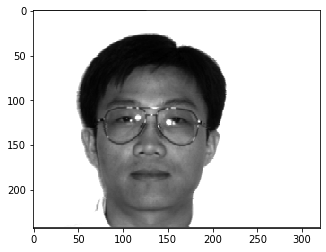

In [58]:
test14 = np.array(Image.open(PATH+test_sub14)).flatten()
plt.imshow(test14.reshape(width,height),cmap='gray')

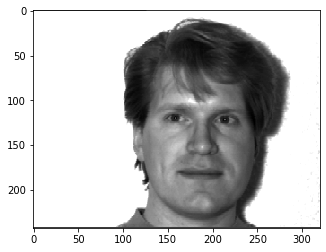

In [57]:
test1 = np.array(Image.open(PATH+test_sub1)).flatten()
plt.imshow(test1.reshape(width,height),cmap='gray')

### Normalizing the faces
because we have normalized the mean faces of training so we have to do the same preprocessing for the test too

In [60]:
normalised_test14 = np.subtract(test14,mean_face14)
normalised_test1 = np.subtract(test1,mean_face1)

### Get the expected weights
Have weights by having a dot product of test image to the projected  eigenspace which wasa result of top 6 eigenvalues 

In [76]:
w_expected_test_14 = np.dot(projected14, normalised_test14)
w_expected_test_1 = np.dot(projected1, normalised_test1)

### Get the difference of the weights. Lower the difference, more the image is closer to the test image

In [77]:
diff14  = weight14 - w_expected_test_14
normalised_weights14 = np.linalg.norm(diff14, axis=1)
print(normalised_weights14)

[4.79283594e+07 3.53519111e+08 4.62701714e+07 6.83686843e+08
 1.03594800e+08 1.63947961e+08 1.63947961e+08 4.73858576e+07
 1.87615707e+08]


In [78]:
min(normalised_weights14)

46270171.420362286

Test image is very sililar to 3rd image in training

### Face Recognisation using PCA

In [84]:
from sklearn.decomposition import PCA

In [104]:
pca14 = PCA(n_components=6)
pca14.fit_transform(vec14)
comp14 = pca14.components_


pca1 = PCA(n_components=6)
pca1.fit_transform(vec1)
comp1 = pca1.components_

In [105]:
print(f'Score of Test14 and first component of subject14 {np.dot(comp14[0].T,normalised_test14)}')

Score of Test14 and first component of subject14 -3776.262655542403


In [106]:
print(f'Score of Test14 and first component of subject1 {np.dot(comp1[0].T,normalised_test14)}')

Score of Test14 and first component of subject1 -2096.4835340784825


In [107]:
print(f'Score of Test1 and first component of subject14 {np.dot(comp14[0].T,normalised_test1)}')

Score of Test1 and first component of subject14 4038.480156716072


In [108]:
print(f'Score of Test1 and first component of subject1 {np.dot(comp1[0].T,normalised_test1)}')

Score of Test1 and first component of subject1 -1410.8255561961646


## 9.1

In [178]:
class BAYES():
    '''
    class to implement the bayes theorem
    '''
    def __init__(self,dataset):
        '''
        dataset should be 2-D array of with last column being the LabelEncoded target class
        [[111,222,0],
         [222,111,1]]
        '''
    
        self.dataset = dataset
    
    
    def separate_by_class(self):
        '''
        returns a dictonary of of {class_label:[data_points]}
        '''
        dataset=self.dataset
        separated = dict()
        for i in range(len(dataset)):
            vector = dataset[i]
            class_value = vector[-1]
            if (class_value not in separated):
                separated[class_value] = list()
            separated[class_value].append(vector)
        return separated
 

    def mean(self,numbers):
        '''
        Calculate the mean of a data point (list of numbers)
        '''
        return sum(numbers)/float(len(numbers))
 
   
    def stdev(self,numbers):
        '''
        Calculate the standard deviation of data point (list of numbers)
        '''
        avg = self.mean(numbers)
        variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
        return sqrt(variance)

   
    def summarize_dataset(self,dataset):
        '''
        Calculate the mean, stdev and count for each column in a dataset
        '''
        # dataset=self.dataset
        summaries = [(self.mean(column), self.stdev(column), len(column)) for column in zip(*dataset)]
        del(summaries[-1])
        return summaries

    
    def summarize_by_class(self):
        '''
        Split dataset by class to get statistics for each row or data point
        '''
        dataset=self.dataset
        separated = self.separate_by_class()
        summaries = dict()
        for class_value, rows in separated.items():
            summaries[class_value] = self.summarize_dataset(rows)
        return summaries

    
    def calculate_probability(self,x, mean, stdev):
        '''
        Calculate the Gaussian PDF for any point 
        '''
        exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
        return (1 / (sqrt(2 * pi) * stdev)) * exponent
    

    def calculate_class_probabilities(self,summaries, row):
        '''
        Calculate the probabilities of belonging to each class for a given row or data point
        '''
        total_rows = sum([summaries[label][0][2] for label in summaries])
        probabilities = dict()
        for class_value, class_summaries in summaries.items():
            probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
            for i in range(len(class_summaries)):
                mean, stdev, _ = class_summaries[i]
                probabilities[class_value] *= self.calculate_probability(row[i], mean, stdev)
        return probabilities
    
 
    def fit_train(self):
        '''
        calculate all the necessary implementations to fit the data first
        '''
        dataset = self.dataset
        self.summaries = self.summarize_by_class()
        
        
    def predict_prob(self,test_point):
        '''
        predict probabilities for each given in dataset for the data point
        '''
        return self.calculate_class_probabilities(self.summaries, test_point)
    
    
    
    def predict_label(self,test_point):
        '''
        predict label for the data point
        '''
        prob = self.calculate_class_probabilities(self.summaries, test_point)
        maxi = -999
        key = False
        curr_label = False
        for key in prob:
            if prob[key]>maxi:
                maxi = prob[key]
                curr_label = key
        return(curr_label)

In [249]:
df = pd.read_csv('usps-2cls.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0,0,95,107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,78,95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,42,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
X = df.iloc[:,:256].values
y = df.iloc[:,256].values.reshape(-1,1)

In [243]:
for ratio in [0.1,0.2,0.5,0.8,0.9]:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=ratio)
    dataset = np.append(X_train,y_train,axis=1)
    

In [244]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 
dataset = np.append(X_train,y_train,axis=1)

In [245]:
def predict(train_data,test_data):
    bayes = BAYES(train_data)
    bayes.fit_train()
    y_pred = []
    for i in range(len(test_data)):
        y_pred.append(bayes.predict_label(test_data[i]))
    return y_pred